# Spam or Ham 

### Contents:
* EDA/Cleaning
* Most Frequent Words
* Text Data Cleaning
* Count Vectorizing
* Term frequency-inverse document frequency (TFIDF)
* Next Steps

# EDA/Cleaning

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import string

import nltk


sns.set(style="darkgrid")
pd.options.mode.chained_assignment = None

In [222]:
df = pd.read_csv('datasets/spam.csv', encoding = 'latin1')

In [223]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [224]:
# Cleaning up df with column names and removal of unnamed columns
df = df[['v1', 'v2']].rename(columns = {'v1': 'class', 'v2':'sms'})
df

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [225]:
# Sampling what a ham sms looks like 
df[df['class'] == 'ham'].iloc[0]['sms']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [226]:
# Sampling what a spam sms looks like
df[df['class'] == 'spam'].iloc[0]['sms']

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [227]:
# Seeing if there are any NaN Values
df.isna().sum()

class    0
sms      0
dtype: int64

In [228]:
# Creating Numerical Labels for classification
label = {'ham': 0, 'spam': 1}
df['spam'] = df['class'].map(label)
df

,class,sms,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [229]:
# Lowercasing all the sms messages to standardize all the messages
df['sms'] = df['sms'].str.lower()
df['sms']


0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: sms, Length: 5572, dtype: object

In [230]:
# Getting the character Lengths
df['char_length'] = df['sms'].apply(len)
df

,class,sms,spam,char_length
0,ham,"go until jurong point, crazy.. available only ...",0,111
1,ham,ok lar... joking wif u oni...,0,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155
3,ham,u dun say so early hor... u c already then say...,0,49
4,ham,"nah i don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,1,161
5568,ham,will ì_ b going to esplanade fr home?,0,37
5569,ham,"pity, * was in mood for that. so...any other s...",0,57
5570,ham,the guy did some bitching but i acted like i'd...,0,125


Text(0.5, 0, 'Length of SMS')

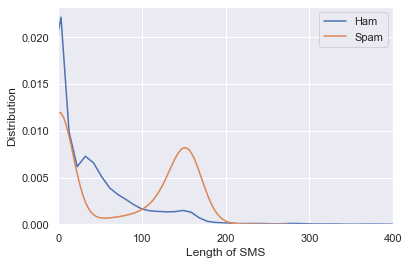

<Figure size 1152x432 with 0 Axes>

In [231]:
# Visualizing char_lengthb
hams_length = df[df['spam'] == 0][['spam', 'char_length']]
spam_length = df[df['spam'] == 1][['spam', 'char_length']]
ax = sns.distplot(hams_length, hist = False, label = 'Ham')
ax = sns.distplot(spam_length, hist = False, label = 'Spam')
plt.xlim(0, 400)
sns.set(font_scale=1.3)
plt.figure(figsize=(16, 6))
ax.set_ylabel('Distribution')
ax.set_xlabel('Length of SMS')

In [232]:
# Describe for Ham Sms
df[df['spam'] == 0].describe()

,spam,char_length
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [233]:
# Describe for Spam Sms
df[df['spam'] == 1].describe()

,spam,char_length
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


The Descriptive Statistics above along with the histogram make it clear that spam sms messages seem to be longer than ham sms messages in terms of character count.

But what about word count?

In [234]:
# Word Count
df['word_count'] = df['sms'].str.split().str.len()
df

,class,sms,spam,char_length,word_count
0,ham,"go until jurong point, crazy.. available only ...",0,111,20
1,ham,ok lar... joking wif u oni...,0,29,6
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155,28
3,ham,u dun say so early hor... u c already then say...,0,49,11
4,ham,"nah i don't think he goes to usf, he lives aro...",0,61,13
...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,1,161,30
5568,ham,will ì_ b going to esplanade fr home?,0,37,8
5569,ham,"pity, * was in mood for that. so...any other s...",0,57,10
5570,ham,the guy did some bitching but i acted like i'd...,0,125,26


Text(0.5, 0, 'Length of SMS')

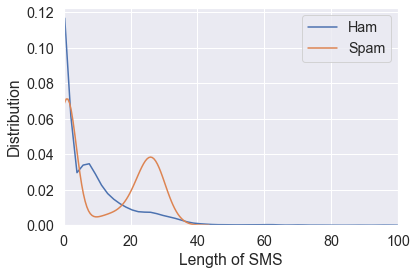

<Figure size 1152x432 with 0 Axes>

In [235]:
# Visualizing Word Count per sms
hams_length = df[df['spam'] == 0][['spam', 'word_count']]
spam_length = df[df['spam'] == 1][['spam', 'word_count']]
ax = sns.distplot(hams_length, hist = False, label = 'Ham')
ax = sns.distplot(spam_length, hist = False, label = 'Spam')
plt.xlim(0, 100)
sns.set(font_scale=1.3)
plt.figure(figsize=(16, 6))
ax.set_ylabel('Distribution')
ax.set_xlabel('Length of SMS')

In [236]:
df.char_length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: char_length, dtype: float64

In [237]:
df.word_count.describe()

count    5572.000000
mean       15.494436
std        11.329427
min         1.000000
25%         7.000000
50%        12.000000
75%        23.000000
max       171.000000
Name: word_count, dtype: float64

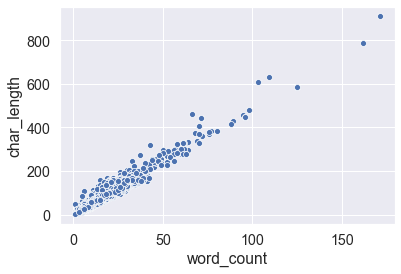

In [238]:
sns.scatterplot(x="word_count", y="char_length", data=df)

Character Lengths is surprisingly Similar to Word Count with almost a linear relationship! To avoid problems with collinearity, it is best if we only use one

In [239]:
# Removal of Word_count
df = df.drop('word_count', axis = 1).reset_index(drop = True)
df

,class,sms,spam,char_length
0,ham,"go until jurong point, crazy.. available only ...",0,111
1,ham,ok lar... joking wif u oni...,0,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155
3,ham,u dun say so early hor... u c already then say...,0,49
4,ham,"nah i don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,1,161
5568,ham,will ì_ b going to esplanade fr home?,0,37
5569,ham,"pity, * was in mood for that. so...any other s...",0,57
5570,ham,the guy did some bitching but i acted like i'd...,0,125


## Most Frequent Words 

For Interest, I wanted to see what the top occuring words are for spam and ham respectively

In [240]:
from nltk.corpus import stopwords


spam_dictionary = {}
ham_dictionary = {}

#Function to Count word occurences in dictionary
def word_count(word, dict):
    
    #Attempts to remove punctuation at the end of a sentence
    if word[-1] in list(string.punctuation):
        word = word[0:len(word) - 1]

    
    # Removing Stopwords
    if word not in set(stopwords.words('english')) and word != '':
        if word in dict: 
            dict[word] += 1

        else: 
            dict[word] = 1

        
        
ham_list = ' '.join(df[df['spam'] == 0]['sms'].tolist()).split()
spam_list = ' '.join(df[df['spam'] == 1]['sms'].tolist()).split()

for text in ham_list:
    word_count(text, ham_dictionary)
    
for text in spam_list:
    word_count(text, spam_dictionary)    

In [241]:
# Create Dataframes for word counts and selecting top 10 words
spam_count = pd.DataFrame(list(spam_dictionary.items()), columns = ['word', 'count']).sort_values(by = 'count', ascending = False).iloc[:10]
ham_count = pd.DataFrame(list(ham_dictionary.items()), columns = ['word', 'count']).sort_values(by = 'count', ascending = False).iloc[:10]

In [242]:
# Top Occuring words in Ham sms
ham_count[['word']]

,word
20,u
58,i'm
95,2
251,get
247,&lt;#&gt
0,go
130,ur
169,know
38,like
16,ok


Surprisingly, __&lt;#&gt__ is the 5th most frequent word that appears in ham sms message. Maybe this is syntax for formatting in sms messages?


In [243]:
# Top Occuring words in Spam sms
spam_count[['word']]

,word
50,call
0,free
2,2
17,txt
60,u
117,ur
57,mobile
13,text
85,4
49,claim


Note: Although counts for each word were calculated, they were not provided for they could not be used for comparison. This is due to the fact that there is an imbalance in spam versus ham samples in the dataset. `This imbalance will be addressed later`

Additionally, I notice that there may be some words that we may not want to include in our analysis, such as 2, u, 4, ur, since both appear frequently in spam and ham messages. Furthermore, after seeing &lt;#&gt appear as one of ham sms' most frequent words, it might be a good idea to improve my punctuation removal function.

We will need to reformat our data once more.

## Text Data Cleaning

Prior to vectorizing our data, it might be in our best interest to address the issues above.

In [244]:
def text_cleaning(word):
    
    # words to remove
    remove_words = list(stopwords.words('english')) + ['u', 'ur', '2', '4', 'ü']
    
    # removing punctuation
    no_punc = []
    for char in word:
        if char not in string.punctuation:
            no_punc.append(char)
    
    puncless = ''.join(no_punc)
    
    # return cleaned sms message
    return ' '.join([text for text in puncless.split() if text not in remove_words])

df['cleaned sms'] = df['sms'].apply(text_cleaning)

In [245]:
train.head()

,class,sms,spam,char_length
0,ham,im always yahoo messenger send message ill get...,0,158
1,ham,sweet heart,0,24
2,spam,cmon babe make horny turn txt fantasy babe im ...,1,148
3,ham,oops sorry check dont mind picking tomo half e...,0,110
4,ham,every king crying baby every great building ma...,0,143


In [246]:
# replacing sms with the cleaned version
df['sms'] = df['cleaned sms']
df = df.drop(columns = {'cleaned sms'})
df.head()

,class,sms,spam,char_length
0,ham,go jurong point crazy available bugis n great ...,0,111
1,ham,ok lar joking wif oni,0,29
2,spam,free entry wkly comp win fa cup final tkts 21s...,1,155
3,ham,dun say early hor c already say,0,49
4,ham,nah dont think goes usf lives around though,0,61


Now that we have a cleaned up our data, I want to see if I can use NLP with NLTK to vectorize my dataset

## Count Vectorizing and Bag-of-words: Model Preparation

Other than char_length, we don't have a lot of data to base a model after. Therefore, we can use count vectorizing get a count of how often a word appears in each sms message, an approach known as Bag-of-words.

In [247]:
# Splitting Data to Training and Testing Set
x = df.drop(columns = ['spam'])
y = df['spam']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=40)
x_train.reset_index(drop = True, inplace = True)
x_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
x_train

,class,sms,char_length
0,ham,im always yahoo messenger send message ill get...,158
1,ham,sweet heart,24
2,spam,cmon babe make horny turn txt fantasy babe im ...,148
3,ham,oops sorry check dont mind picking tomo half e...,110
4,ham,every king crying baby every great building ma...,143
...,...,...,...
3728,ham,hello peach cake tasts lush,32
3729,ham,still checked da,35
3730,ham,oh yeah diet flew window,45
3731,ham,sounds good keep posted,27


In [248]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

#Creating a vocabulary dictionary
document_matrix = vectorizer.fit(x_train['sms'])
len(document_matrix.vocabulary_)

7627

In [249]:
# Testing out our CountVectorizer() on one sms messages
train_bow = vectorizer.transform([x_train['sms'][10]])
print(test_bow)
train_bow.shape

  (0, 5301)	1


(1, 7627)

With .transform, our model is able to return to us a document term matrix that returns the count of each respective word. Seems like there are only 14 words from our dictionary of 7627 that appear in this sms message

In [250]:
# Seeing what word 2026 correlates to
print(vectorizer.get_feature_names()[2026])

cried


In [251]:
# Double Checking to see if the message contains the word above
x_train['sms'][10]

'princess'

In [252]:
# Applying the CountVectorizer() to the dataset
train_count = vectorizer.transform(x_train['sms'])

In [253]:
# Getting Shape of Matrix
print('Shape of Sparse Matrix: ', train_count.shape)
print('Amount of Non-Zero occurences: ', train_count.nnz)

Shape of Sparse Matrix:  (3733, 7627)
Amount of Non-Zero occurences:  31571


In [254]:
# Returning CountVectorized/Hot-one-encoded matrix
bow_matrix = pd.DataFrame(train_count.toarray(), columns=vectorizer.get_feature_names())
bow_matrix

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,0207,02070836089,02072069400,...,åômorrow,ìll,ìï,ìïll,ûªm,ûªt,ûªve,ûï,ûïharry,ûò
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


If you are like me, when you first saw the column names, you might have thought that something in my code must have gone wrong. However, after looking through my dataset, I realized that all of these columns names have appeared in at least one sms message. Surprisingly, nothing is wrong is my code. Some of my sms messages just contain very confusing words. Example below:

In [255]:
# Searching for a sms message index that contains 'åômorrow'
bow_matrix.loc[bow_matrix['åômorrow'] == True]


,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,0207,02070836089,02072069400,...,åômorrow,ìll,ìï,ìïll,ûªm,ûªt,ûªve,ûï,ûïharry,ûò
110,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [256]:
# Returning the sms
x_train['sms'].iloc[110]

'th gower mate r man good wales ill b back åômorrow c wk msg åð random'

## Term frequency-inverse document frequency

Although the Vectorization was able to provide me with a lot more data, one issue is the weighting system. As of now a cell would either have a value of 0 or 1, aka whether the word appears or not. While this binary distinction is helpful, is it possible to weight these values based on how unique/frequent the word is? This is where I learned about Term Frequency-inverst document frequency (TF-IDF) for it can introduce weights based on a word's importance/frequency in the document.

In [257]:
from sklearn.feature_extraction.text import TfidfTransformer

# Fitting the Dictionary
tftransformer = TfidfTransformer().fit(train_count)

In [258]:
# testing on one sms message to see output (testing on same message as count vectorizer test)
tfidf_test = tftransformer.transform(train_bow)
print(tfidf_test)

  (0, 5301)	1.0


We can see that now instead of 0 and 1, we have more varied values that are dependent on the word's importance

In [259]:
# Applying our TfidfTransfomer to our entire count vectorized dataset
train_tfidf = tftransformer.transform(train_count)

# Let's see what the dataframe looks like after adding weights
train_tfidf = pd.DataFrame(train_tfidf.toarray(), columns = bow_matrix.columns)
train_tfidf.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,0207,02070836089,02072069400,...,åômorrow,ìll,ìï,ìïll,ûªm,ûªt,ûªve,ûï,ûïharry,ûò
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
# Finally we are going to join this dataframe with our original training dataset

# We add a suffix because both class and sms are words that appeared in our messages and need to be differentiated
cleaned_train = x_train.join(train_tfidf, rsuffix = '_word', how = 'left')
cleaned_train

,class,sms,char_length,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,...,åômorrow,ìll,ìï,ìïll,ûªm,ûªt,ûªve,ûï,ûïharry,ûò
0,ham,im always yahoo messenger send message ill get...,158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,sweet heart,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,cmon babe make horny turn txt fantasy babe im ...,148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,oops sorry check dont mind picking tomo half e...,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,every king crying baby every great building ma...,143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,ham,hello peach cake tasts lush,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3729,ham,still checked da,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3730,ham,oh yeah diet flew window,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3731,ham,sounds good keep posted,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [261]:
cleaned_train['sms'].isnull().values.any()

False

In [268]:
# Vectorizing and TFIDF for test sets
test_count = vectorizer.transform(x_test['sms'])
test_tfidf = tftransformer.transform(test_count)
test_tfidf = pd.DataFrame(test_tfidf.toarray(), columns = bow_matrix.columns)
cleaned_testing = x_test.join(test_tfidf, rsuffix = '_word', how = 'left')
cleaned_testing.head()

,class,sms,char_length,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,...,åômorrow,ìll,ìï,ìïll,ûªm,ûªt,ûªve,ûï,ûïharry,ûò
0,ham,c movie juz last minute decision mah juz watch...,85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,spam,show colours euro 2004 241 offer get england f...,135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ham,dont let studying stress l8r,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,merry christmas babe love ya kisses,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,wake gt,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Next Steps

Now that we have tranformed our data to be more ideal for model creation, we are prepared to test out some models. However, as you can see below, there is a big imbalance between samples of spam and ham data in our training dataset. This imbalance could potentially mess and bias our model. 

To solve this issue and the organized everything neatly, I will be implementing SMOTE on this cleaned training dataset in my Imbalance.ipynb file. 

In [262]:
counts = train.groupby('class').count()[['sms']]
counts

,sms
class,
ham,3228
spam,505


In [270]:
# Exporting Data to be used in next Jupyter Notebook File
cleaned_train.to_csv('datasets/cleaned_training.csv', index = False)
cleaned_test.to_csv('datasets/cleaned_testing.csv', index = False)
y_train.to_csv('datasets/train_labels.csv', index = False)
y_test.to_csv('datasets/test_labels.csv', index = False)